# Haar Transform of Signal

Let's start by taking one level of the transform, so just sums and differences

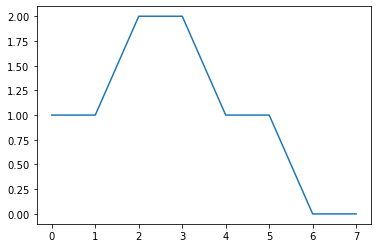

Sums vector:
[1.41421356 2.82842712 1.41421356 0.        ]
Differences vector:
[0. 0. 0. 0.]


In [1]:
import numpy as np
import pywt  # Python Wavelets Package
import matplotlib.pyplot as plt

x = [1,1,2,2,1,1,0,0]

plt.figure()
plt.plot(x)
plt.show()

(s, d) = pywt.dwt(x, 'haar')
print('Sums vector:')
print(s)
print('Differences vector:')
print(d)

Great, now let's do the entire decomposition

In [3]:
coeffs = pywt.wavedec(x, 'haar')
coeffs  # List of Arrays of coefficients

[array([2.82842712]),
 array([1.41421356]),
 array([-1.,  1.]),
 array([0., 0., 0., 0.])]

In [4]:
cPhi, cPsi0, cPsi1, cPsi2 = coeffs
print('Coefficient of Phi')
print(cPhi)
print('Coefficient of Psi0')
print(cPsi0)
print('Coefficients of Psi1')
print(cPsi1)
print('Coefficients of Psi2')
print(cPsi2)

Coefficient of Phi
[2.82842712]
Coefficient of Psi0
[1.41421356]
Coefficients of Psi1
[-1.  1.]
Coefficients of Psi2
[0. 0. 0. 0.]


Can we get back to the original signal?

In [ ]:
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec')

In [18]:
arr2 = list([np.array([10/np.sqrt(2)]), np.array([3/np.sqrt(2)]),np.array([1/2,1/2]),np.array([np.sqrt(2)/2,np.sqrt(2),np.sqrt(2),np.sqrt(2)/2])])

In [19]:
arr2

[array([7.07106781]),
 array([2.12132034]),
 array([0.5, 0.5]),
 array([0.70710678, 1.41421356, 1.41421356, 0.70710678])]

In [8]:
arr

array([7.07106781, 2.12132034, 0.5       , 0.5       , 0.70710678,
       1.41421356, 1.41421356, 0.70710678])

In [9]:
coeffs_reconstruct

[array([2.82842712]),
 array([1.41421356]),
 array([-1.,  1.]),
 array([0., 0., 0., 0.])]

In [10]:
coeffs

[array([2.82842712]),
 array([1.41421356]),
 array([-1.,  1.]),
 array([0., 0., 0., 0.])]

[7.07106781 2.12132034 0.5        0.5        0.70710678 1.41421356
 1.41421356 0.70710678]
[(slice(None, 1, None),), {'d': (slice(1, 2, None),)}, {'d': (slice(2, 4, None),)}, {'d': (slice(4, 8, None),)}]
[array([7.07106781]), array([2.12132034]), array([0.5, 0.5]), array([0.70710678, 1.41421356, 1.41421356, 0.70710678])]


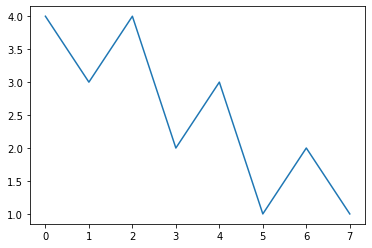

In [20]:
# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(arr2)
print(arr)
print(coeff_slices)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec')
print(coeffs_reconstruct)



# Reconstruct signal
xhat = pywt.waverec(coeffs_reconstruct, 'haar')
plt.figure()
plt.plot(xhat)
plt.show()

In [21]:
xhat

array([4., 3., 4., 2., 3., 1., 2., 1.])

## What if there is noise?

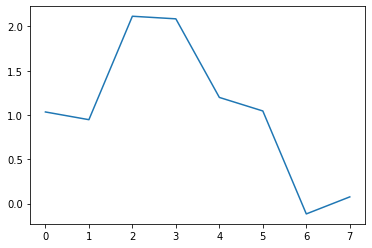

[ 2.96557388  1.40635931 -1.10916852  1.14218551  0.06164009  0.02068607
  0.10813343 -0.13593358]


In [38]:
# Noisy signal
xnoise = x + .1*np.random.randn(len(x))
plt.figure()
plt.plot(xnoise)
plt.show()

# Coefficients
coeffs = pywt.wavedec(xnoise, 'haar')

# Turn into array 
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
print(arr)

Let's remove small coefficients and go back

[ 2.96557388  1.40635931 -1.10916852  1.14218551  0.          0.
  0.          0.        ]


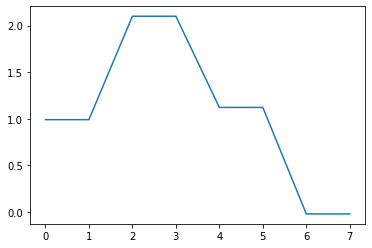

In [39]:
# Remove small values
threshold = 0.5
arr[np.abs(arr)<threshold] = 0
print(arr)

# Turn back into coefficients
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec')

# Reconstruct signal
xrec = pywt.waverec(coeffs_reconstruct, 'haar')
plt.figure()
plt.plot(xrec)
plt.show()

## What about a larger signal?

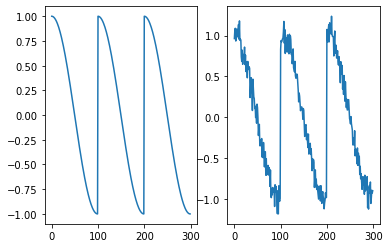

In [40]:
t = np.linspace(0,1,100)
x = np.concatenate((np.cos(np.pi*t), np.cos(np.pi*t), np.cos(np.pi*t)))
xnoise = x + .1*np.random.randn(len(x))
plt.figure()
plt.subplot(1,2,1)
plt.plot(x)
plt.subplot(1,2,2)
plt.plot(xnoise)
plt.show()

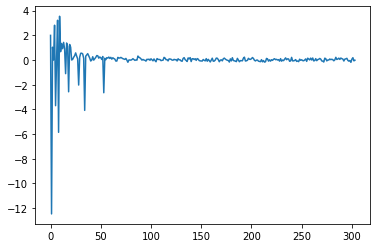

In [41]:
# Coefficients
coeffs = pywt.wavedec(xnoise, 'haar')

# Turn into array 
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.figure()
plt.plot(arr)
plt.show()


0.2811306865573993


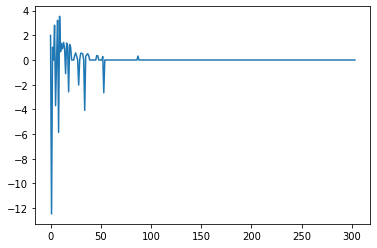

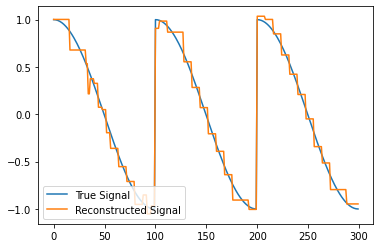

In [42]:
threshold = np.mean(np.abs(arr))
print(threshold)

# Filter coefficients
arr[np.abs(arr)<threshold] = 0

plt.figure()
plt.plot(arr)
plt.show()

# Turn back into coefficients
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec')

# Reconstruct signal
xrec = pywt.waverec(coeffs_reconstruct, 'haar')
plt.figure()
plt.plot(x, label='True Signal')
plt.plot(xrec, label='Reconstructed Signal')
plt.legend(loc='lower left')
plt.show()

## What about a larger signal that's relatively constant for long amounts of time?

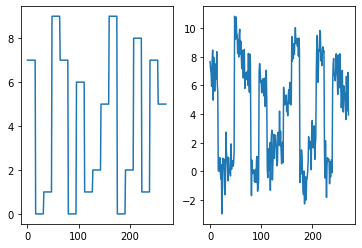

In [43]:
x = np.random.randint(10)*np.ones(16)
for i in range(16):
    x = np.concatenate((x, np.random.randint(10)*np.ones(16)))
xnoise = x + np.random.randn(len(x))
plt.figure()
plt.subplot(1,2,1)
plt.plot(x)
plt.subplot(1,2,2)
plt.plot(xnoise)
plt.show()

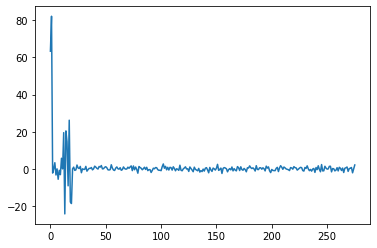

In [44]:
# Coefficients
coeffs = pywt.wavedec(xnoise, 'haar')

# Turn into array 
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.figure()
plt.plot(arr)
plt.show()


### Filter vertically and only keep spikes

1.8730741003801779


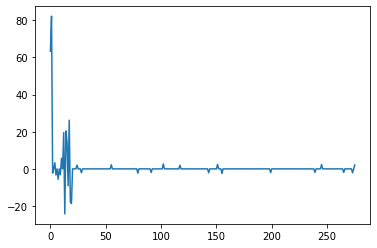

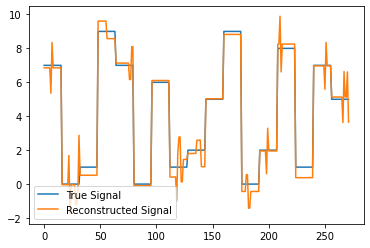

In [45]:
threshold = np.mean(np.abs(arr))
print(threshold)

# Filter coefficients
arr[np.abs(arr)<threshold] = 0

plt.figure()
plt.plot(arr)
plt.show()

# Turn back into coefficients
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec')

# Reconstruct signal
xrec = pywt.waverec(coeffs_reconstruct, 'haar')
plt.figure()
plt.plot(x, label='True Signal')
plt.plot(xrec, label='Reconstructed Signal')
plt.legend(loc='lower left')
plt.show()

### Filter horizontally and only keep wavelets larger than a given support

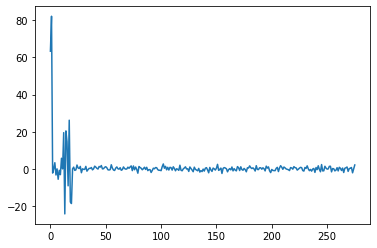

In [46]:
# Coefficients
coeffs = pywt.wavedec(xnoise, 'haar')

# Turn into array 
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.figure()
plt.plot(arr)
plt.show()


[array([63.29180551, 82.10647676]), array([-2.26239083,  0.        ]), array([ 3.31562335, -3.29947592,  0.        ]), array([-5.59263651, -0.77266563, -3.10844557,  5.71409408,  0.        ]), array([ 19.48811617, -24.23411311,  20.42136168,  14.620086  ,
        -9.11595912,  26.18089392, -17.82020294, -18.64290046,
         0.        ]), array([ 0.92843925, -0.82432359, -0.56018821,  2.0622764 ,  0.48230489,
        0.16748321,  1.31840521, -2.07565317,  0.02587984, -0.28043784,
       -0.28857392,  1.33875135, -1.23397538, -0.39358496,  0.29724421,
        0.24930732,  0.73384542]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.,

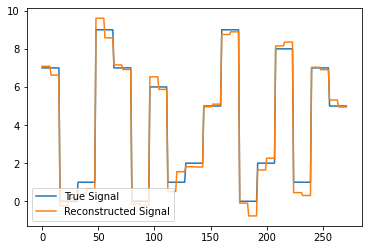

In [47]:
level = 6

for i in range(level,len(coeffs)):
    coeffs[i] = np.zeros(len(coeffs[i]))
    
print(coeffs)

# Reconstruct signal
xrec = pywt.waverec(coeffs, 'haar')
plt.figure()
plt.plot(x, label='True Signal')
plt.plot(xrec, label='Reconstructed Signal')
plt.legend(loc='lower left')
plt.show()